In [1]:
import keras
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices(device_type='GPU')


Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
usaPolyGrid = pkl.load(open("util/usaPolyGrid.pkl",'rb'))
base_path = 'Data/'
grids = np.array(list(usaPolyGrid.keys()),np.int32)

## Format Data

In [4]:

# ds_train = tf.keras.preprocessing.image_dataset_from_directory(
#     'Data/',
#     labels='inferred',
#     label_mode = 'categorical',
#     color_mode='grayscale',
#     batch_size=64,
#     image_size=(1000, 1000),
#     shuffle=True,
#     seed=123,
#     validation_split=.15,
#     subset="training"
# )
#
# ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
#     'Data/',
#     labels='inferred',
#     label_mode = 'categorical',
#     color_mode='grayscale',
#     batch_size=64,
#     image_size=(1000, 1000),
#     shuffle=True,
#     seed=123,
#     validation_split=.15,
#     subset="validation"
# )
batch_size = 64
img_height = 1000
img_width = 1000

train_ds = tf.keras.utils.image_dataset_from_directory(
    'Simplified_Data',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    'Simplified_Data',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)



Found 83708 files belonging to 243 classes.
Using 66967 files for training.
Found 83708 files belonging to 243 classes.
Using 16741 files for validation.


['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '22

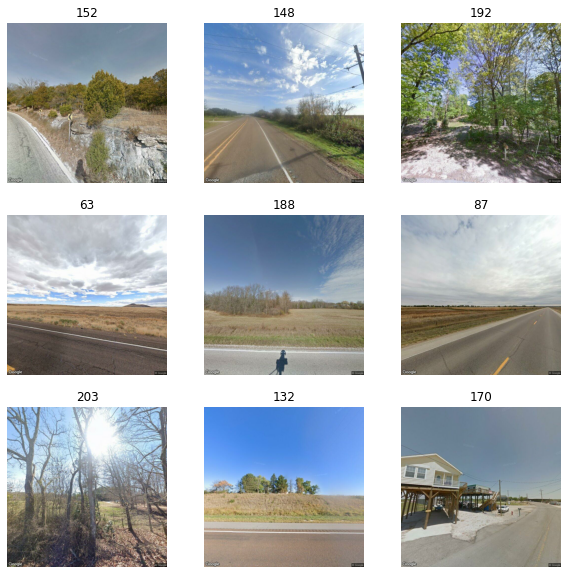

In [5]:
def augment(x,y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return  image,y
train_ds = train_ds.map(augment)

labels = []
for i in range(243):
    labels.append(i)

class_names = val_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")




In [6]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(64, 1000, 1000, 3)
(64,)


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)


In [8]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))



In [9]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 1000, 1000, 3)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1000, 1000, 16)    448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 500, 500, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 500, 500, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 125, 125, 64)      0

In [ ]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10


NameError: name 'class_names' is not defined

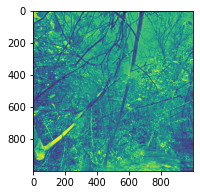

In [13]:
# import matplotlib.pyplot as plt
#
# plt.figure(figsize=(10, 10))
# for images, labels in ds_train.take(1):
#     for i in range(243):
#         ax = plt.subplot(3,81, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")
#

In [11]:
# from tensorflow.keras import layers
# from tensorflow import keras
#
# model = keras.Sequential([
#     layers.Input((1000, 1000, 1)),
#     layers.Conv2D(16,3,padding='same'),
#     layers.Conv2D(32,3,padding='same'),
#     layers.MaxPool2D(),
#     layers.Flatten(),
#     layers.Dense(10),
# ])

In [ ]:
# model.compile(optimizer=keras.optimizers.Adam(),
#               loss=[
#                   keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               ],
#               metrics=['accuracy'],
#             )
# model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10


In [15]:
# dir = 'locations_train.csv'
# df = pd.read_csv(dir)
#
# file_paths = df['path'].values
# labels = df['grid'].values
# training_data =tf.data.Dataset.from_tensor_slices((file_paths, labels))
# def read_image(image_file, label):
#     image = tf.io.read_file(image_file)
#     image = tf.image.decode_image(image, channels=1, dtype=tf.float32)
#     return image, label
#
# training_data = training_data.map(read_image).batch(64)

In [19]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
# model.add(tf.keras.layers.Flatten())
#
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# model.fit(training_data, epochs=10, verbose=2)

Epoch 1/10


ValueError: in user code:

    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/engine/training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/shane/Documents/dev/Geoguessr_example/venv/lib/python3.6/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
